# Linear Methods for Regression

Scikit-Learn API has the following (consistent) structure:

* *model = Estimator()*
* *model.fit(X, y)*
* *predictions = model.predict(X)*

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import sklearn.metrics as metrics
import seaborn
%matplotlib inline

R-squared = 0.8971942610828957
Coefficients = [0.04575482 0.18799423]


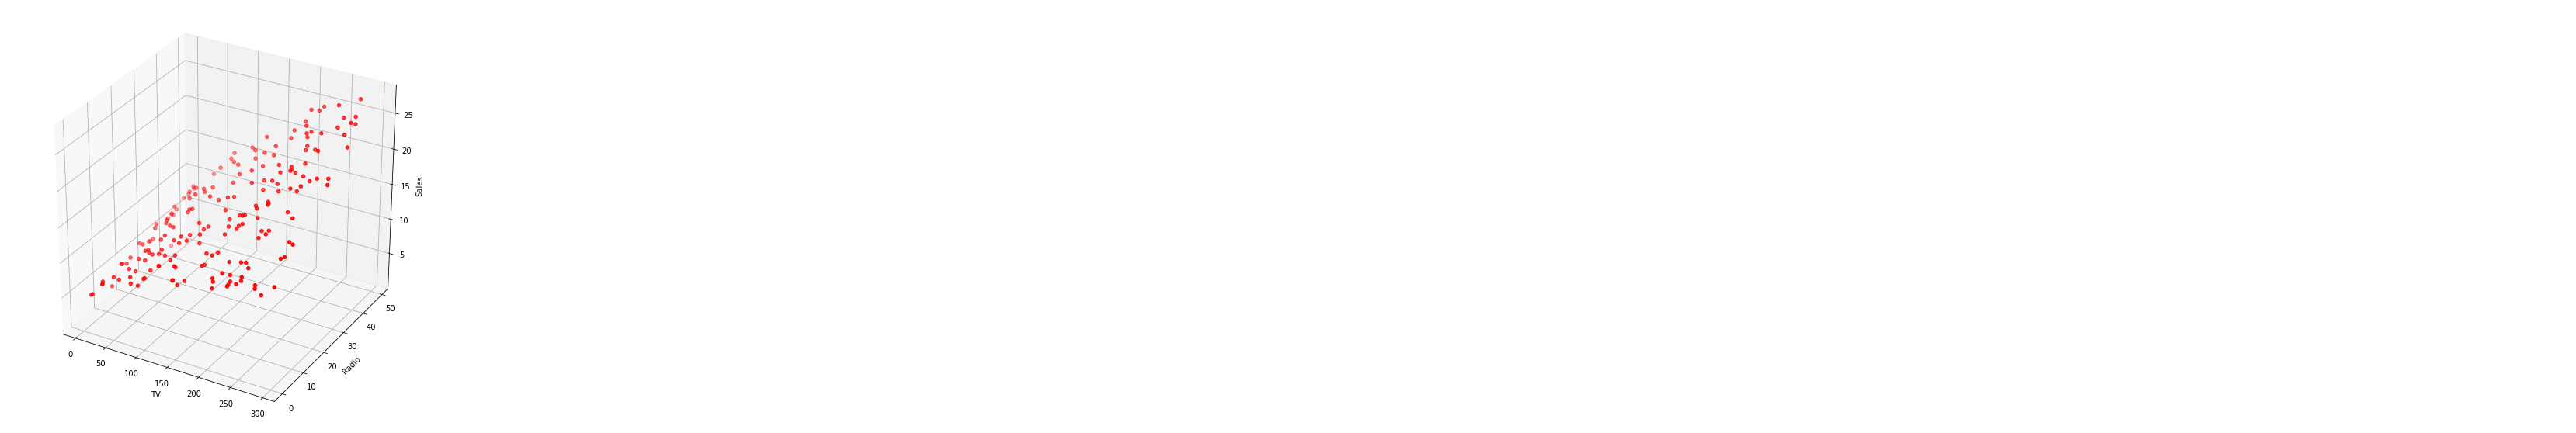

In [4]:
# Fit Ordinary Least Squares: OLS
csv = pd.read_csv('https://raw.githubusercontent.com/buruzaemon/me-ml/master/ISLR/Data/Advertising.csv', index_col=0)
X = csv[['TV', 'Radio']]
y = csv['Sales']
lr = lm.LinearRegression().fit(X, y)
y_pred = lr.predict(X)
print("R-squared =", metrics.r2_score(y, y_pred))
print("Coefficients =", lr.coef_)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(csv['TV'], csv['Radio'], csv['Sales'], c='r', marker='o')
xx1, xx2 = np.meshgrid(
    np.linspace(csv['TV'].min(), csv['TV'].max(), num=10), 
    np.linspace(csv['Radio'].min(), csv['Radio'].max(), num=10))

XX = np.column_stack([xx1.ravel(), xx2.ravel()])
yy = lr.predict(XX)

ax.plot_surface(xx1, xx2, yy.reshape(xx1.shape), color='None')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
_ = ax.set_zlabel('Sales')

## Overfitting

In [5]:
import seaborn

def fit_on_increasing_size(model):
    n_samples = 100
    n_features_ = np.arange(10, 800, 20)
    r2_train, r2_test, snr = [], [], []
    for n_features in n_features_:
    # Sample the dataset (* 2 nb of samples)
        n_features_info = int(n_features/10)
        np.random.seed(42) # Make reproducible
        X = np.random.randn(n_samples * 2, n_features)
        beta = np.zeros(n_features)
        beta[:n_features_info] = 1
        Xbeta = np.dot(X, beta)
        eps = np.random.randn(n_samples * 2)
        y = Xbeta + eps
        # Split the dataset into train and test sample
        Xtrain, Xtest = X[:n_samples, :], X[n_samples:, :]
        ytrain, ytest = y[:n_samples], y[n_samples:]
        # fit/predict
        lr = model.fit(Xtrain, ytrain)
        y_pred_train = lr.predict(Xtrain)
        y_pred_test = lr.predict(Xtest)
        snr.append(Xbeta.std() / eps.std())
        r2_train.append(metrics.r2_score(ytrain, y_pred_train))
        r2_test.append(metrics.r2_score(ytest, y_pred_test))
    return n_features_, np.array(r2_train), np.array(r2_test), np.array(snr)

def plot_r2_snr(n_features_, r2_train, r2_test, xvline, snr, ax):
    """
    Two scales plot. Left y-axis: train test r-squared. Right y-axis SNR.
    """
    ax.plot(n_features_, r2_train, label="Train r-squared", linewidth=2)
    ax.plot(n_features_, r2_test, label="Test r-squared", linewidth=2)
    ax.axvline(x=xvline, linewidth=2, color='k', ls='--')
    ax.axhline(y=0, linewidth=1, color='k', ls='--')
    ax.set_ylim(-0.2, 1.1)
    ax.set_xlabel("Number of input features")
    ax.set_ylabel("r-squared")
    ax.legend(loc='best')
    ax.set_title("Prediction perf.")
    ax_right = ax.twinx()
    ax_right.plot(n_features_, snr, 'r-', label="SNR", linewidth=1)
    ax_right.set_ylabel("SNR", color='r')
    for tl in ax_right.get_yticklabels():
        tl.set_color('r')

## Ridge Regresssion ($l_1$-regularization)

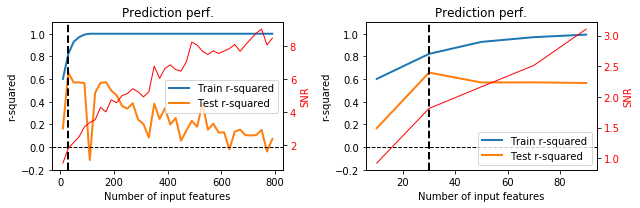

In [6]:
# Model = linear regression
mod = lm.LinearRegression()

# Fit models on dataset
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)
argmax = n_features[np.argmax(r2_test)]

# plot
fig, axis = plt.subplots(1, 2, figsize=(9, 3))

# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])

# Right pane: Zoom on 100 first features
plot_r2_snr(n_features[n_features <= 100], r2_train[n_features <= 100], r2_test[n_features <= 100], 
            argmax, snr[n_features <= 100], axis[1])
plt.tight_layout()

## Lasso Regression ($l_2$-regularization)

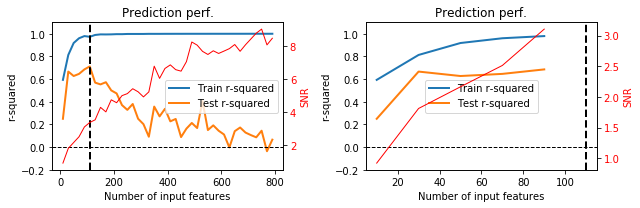

In [7]:
mod = lm.Ridge(alpha=10)

# Fit models on dataset
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)
argmax = n_features[np.argmax(r2_test)]

# plot
fig, axis = plt.subplots(1, 2, figsize=(9, 3))

# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])

# Right pane: Zoom on 100 first features
plot_r2_snr(n_features[n_features <= 100], r2_train[n_features <= 100], 
            r2_test[n_features <= 100], argmax, snr[n_features <= 100], axis[1])
plt.tight_layout()

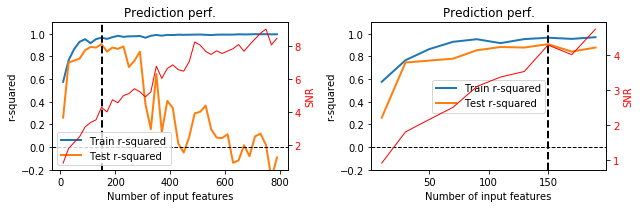

In [8]:
mod = lm.Lasso(alpha=.1)

# Fit models on dataset
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)
argmax = n_features[np.argmax(r2_test)]

# plot
fig, axis = plt.subplots(1, 2, figsize=(9, 3))

# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])

# Right pane: Zoom on 200 first features
plot_r2_snr(n_features[n_features <= 200], r2_train[n_features <= 200], 
            r2_test[n_features <= 200], argmax, snr[n_features <= 200], axis[1])

plt.tight_layout()

## Elastic-net regression ($l_1$-$l_2$-regularization)

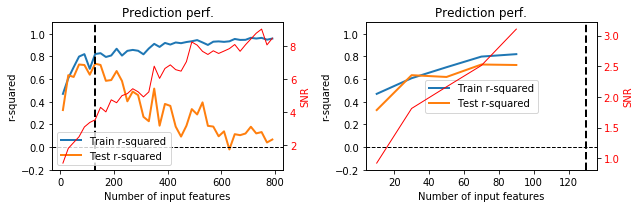

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
mod = lm.ElasticNet(alpha=.5, l1_ratio=.5)
# Fit models on dataset
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)
argmax = n_features[np.argmax(r2_test)]
# plot
fig, axis = plt.subplots(1, 2, figsize=(9, 3))
# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])
# Right pane: Zoom on 100 first features
plot_r2_snr(n_features[n_features <= 100], r2_train[n_features <= 100], r2_test[n_features <= 100], 
            argmax, snr[n_features <= 100], axis[1])
plt.tight_layout()